In [ ]:
import Downloads

In [ ]:
Downloads.download("http://datosabiertos.salud.gob.mx/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip", "covid19.zip")

In [1]:
using DataFrames, Parquet, CSV, ZipFile, Chain, StatsPlots

In [2]:
path = "covid19.zip";
z = ZipFile.Reader(path);

In [3]:
df = read(z.files[1]) |> x -> CSV.File(x, drop=[:FECHA_ACTUALIZACION]) |> DataFrame;

In [ ]:
@chain df begin
    groupby(:ENTIDAD_UM)
    combine(nrow => :num_casos)
end

In [ ]:
filter(:ENTIDAD_UM => x -> x == 9, df)

In [ ]:
@df df density(:EDAD, group=:ENTIDAD_UM)

In [ ]:
@df df density(:EDAD, group=:SEXO)

In [ ]:
@df df density(:FECHA_INGRESO, group=:ENTIDAD_UM)

In [41]:
df_cdmx = filter(:ENTIDAD_UM => x -> x == 9, df);

In [42]:
casos_pos = @chain df_cdmx begin
    groupby(:FECHA_INGRESO)
    filter(row -> row.CLASIFICACION_FINAL ∈ [1,2,3], _)
    combine(nrow => :NUM_CASOS)
    sort(:FECHA_INGRESO)
end;

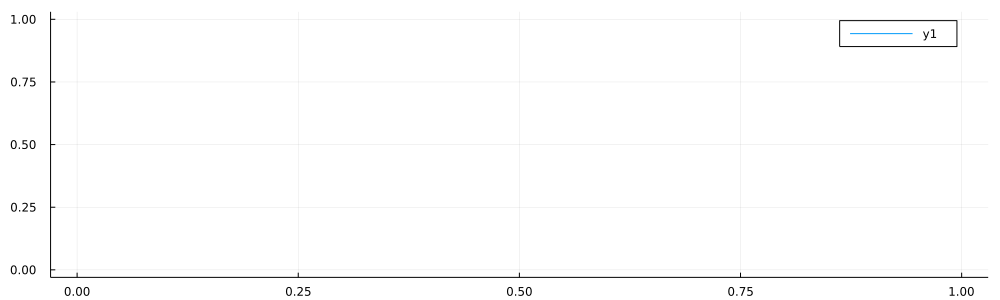

In [44]:
plot(casos_pos.FECHA_INGRESO, casos_pos.NUM_CASOS)

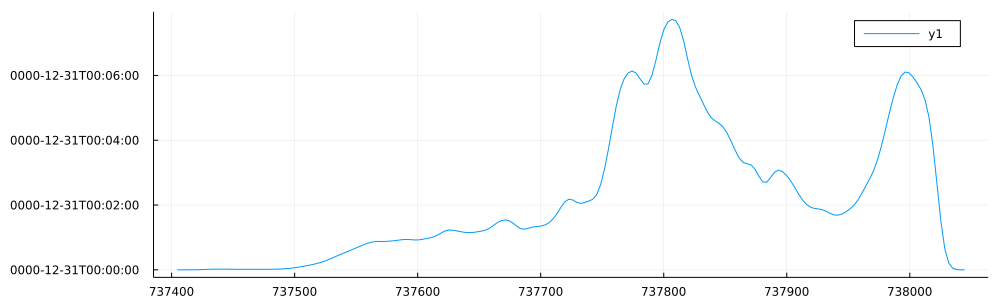

In [29]:
@df df_cdmx density(:FECHA_INGRESO)

In [6]:
gr(size=(1000,300))

Plots.GRBackend()

In [45]:
casos_pos

,FECHA_INGRESO,NUM_CASOS
,Date…,Int64
